In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor


In [9]:
df = pd.read_csv('../data/data_cleaned.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df.head(2)

,country,region,year,happiness_score,economy_(gdp_per_capita),family,health_(life_expectancy),freedom,trust_(government_corruption),generosity,dystopia_residual,food_supply_(kcal/capita/day),"crude_birth_rate_(births_per_1,000_population)",deaths_-_unsafe_water_source_per_100k_people,deaths_-_conflict_and_terrorism
0,Switzerland,Western Europe,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,3460.0,10.364,0.030155,0.0
1,Iceland,Western Europe,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,3548.0,12.933,0.021300,0.0


In [10]:
X = df[['family', 'deaths_-_conflict_and_terrorism', 'freedom', 
        'crude_birth_rate_(births_per_1,000_population)', 'economy_(gdp_per_capita)']]
y = df['happiness_score']

In [12]:
X

,family,deaths_-_conflict_and_terrorism,freedom,"crude_birth_rate_(births_per_1,000_population)",economy_(gdp_per_capita)
0,1.349510,0.000000,0.665570,10.364,1.396510
1,1.402230,0.000000,0.628770,12.933,1.302320
2,1.360580,0.035288,0.649380,10.411,1.325480
3,1.330950,0.000000,0.669730,11.397,1.459000
4,1.322610,0.000000,0.632970,10.710,1.326290
...,...,...,...,...,...
465,0.945707,0.031862,0.581844,32.062,0.368746
466,0.148660,308.409636,0.069120,24.525,0.747190
467,1.041990,0.079669,0.390018,37.075,0.511136
468,0.396103,228.216333,0.081539,24.115,0.777153


In [13]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
465    3.471
466    3.069
467    3.349
468    3.462
469    2.693
Name: happiness_score, Length: 470, dtype: float64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [15]:
ss = StandardScaler()
ss.fit(X_train, y_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [17]:
X_train.shape

(352, 5)

In [18]:
def model_func(layer_one_neurons, layer_two_neurons, dropout_percent):
    print('layer_one', layer_one_neurons, 'layer_two', layer_two_neurons) # only to help troubleshoot
    model = Sequential()
    model.add(Dense(layer_one_neurons, activation='relu', input_shape=(5,)))
    model.add(Dropout(dropout_percent))
    model.add(Dense(layer_two_neurons, activation='relu'))
    model.add(Dropout(dropout_percent))
    model.add(Dense(1, activation=None))
    model.compile(loss='mse', optimizer='adam')
    return model

nn = KerasRegressor(build_fn=model_func, batch_size=8, verbose=0)

params = {
    'epochs': [50, 75, 100],
    'layer_one_neurons': [32, 64, 128],
    'layer_two_neurons': [32, 64, 128],
    'dropout_percent': [.25, .5]
}
gs = GridSearchCV(nn, param_grid=params, cv=5)
gs.fit(X_train_sc, y_train)
print(gs.best_score_) # <- negative mean squared error, ie the higher (less negative) the better
gs.best_params_

<ipython-input-18-06eb6515c845>:12: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  nn = KerasRegressor(build_fn=model_func, batch_size=8, verbose=0)


layer_one 32 layer_two 32
layer_one 32 layer_two 32
layer_one 32 layer_two 32
layer_one 32 layer_two 32
layer_one 32 layer_two 32
layer_one 32 layer_two 64
layer_one 32 layer_two 64
layer_one 32 layer_two 64
layer_one 32 layer_two 64
layer_one 32 layer_two 64
layer_one 32 layer_two 128
layer_one 32 layer_two 128
layer_one 32 layer_two 128
layer_one 32 layer_two 128
layer_one 32 layer_two 128
layer_one 64 layer_two 32
layer_one 64 layer_two 32
layer_one 64 layer_two 32
layer_one 64 layer_two 32
layer_one 64 layer_two 32
layer_one 64 layer_two 64
layer_one 64 layer_two 64
layer_one 64 layer_two 64
layer_one 64 layer_two 64
layer_one 64 layer_two 64
layer_one 64 layer_two 128
layer_one 64 layer_two 128
layer_one 64 layer_two 128
layer_one 64 layer_two 128
layer_one 64 layer_two 128
layer_one 128 layer_two 32
layer_one 128 layer_two 32
layer_one 128 layer_two 32
layer_one 128 layer_two 32
layer_one 128 layer_two 32
layer_one 128 layer_two 64
layer_one 128 layer_two 64
layer_one 128 layer_t

{'dropout_percent': 0.25,
 'epochs': 100,
 'layer_one_neurons': 64,
 'layer_two_neurons': 128}

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test, gs.predict(X_test_sc))

0.7762975357798878

In [20]:
preds = gs.predict(X_test_sc)

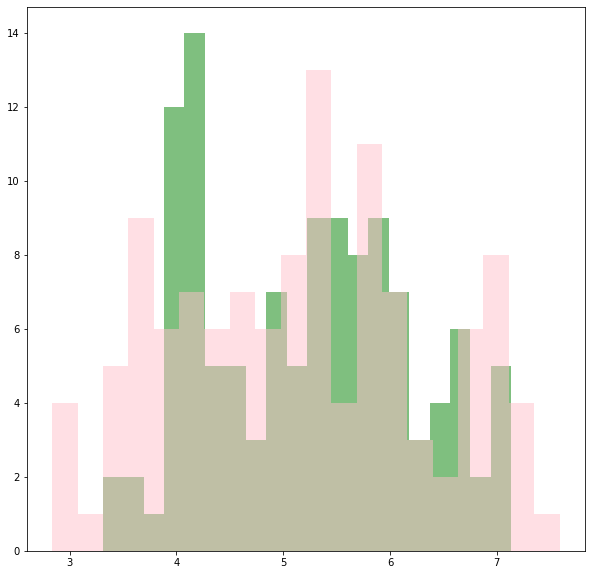

In [22]:
plt.figure(figsize=(10,10))
plt.hist(preds, color="green", alpha=0.5, bins=20, label="Predictions")
plt.hist(y_test, color="pink", alpha=0.5, bins=20, label="Actual");



In [29]:
model2 = Sequential()
model2.add(Dense(64, activation='relu', input_shape=(5,)))
model2.add(Dropout(0.25))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(1, activation=None))
model2.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error'])

history = model2.fit(X_train_sc, y_train, batch_size=8, epochs=100,
                     verbose=0, validation_data=(X_test_sc, y_test))

In [30]:
model2.summary()

Model: "sequential_273"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_818 (Dense)           (None, 64)                384       
                                                                 
 dropout_546 (Dropout)       (None, 64)                0         
                                                                 
 dense_819 (Dense)           (None, 128)               8320      
                                                                 
 dropout_547 (Dropout)       (None, 128)               0         
                                                                 
 dense_820 (Dense)           (None, 1)                 129       
                                                                 
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


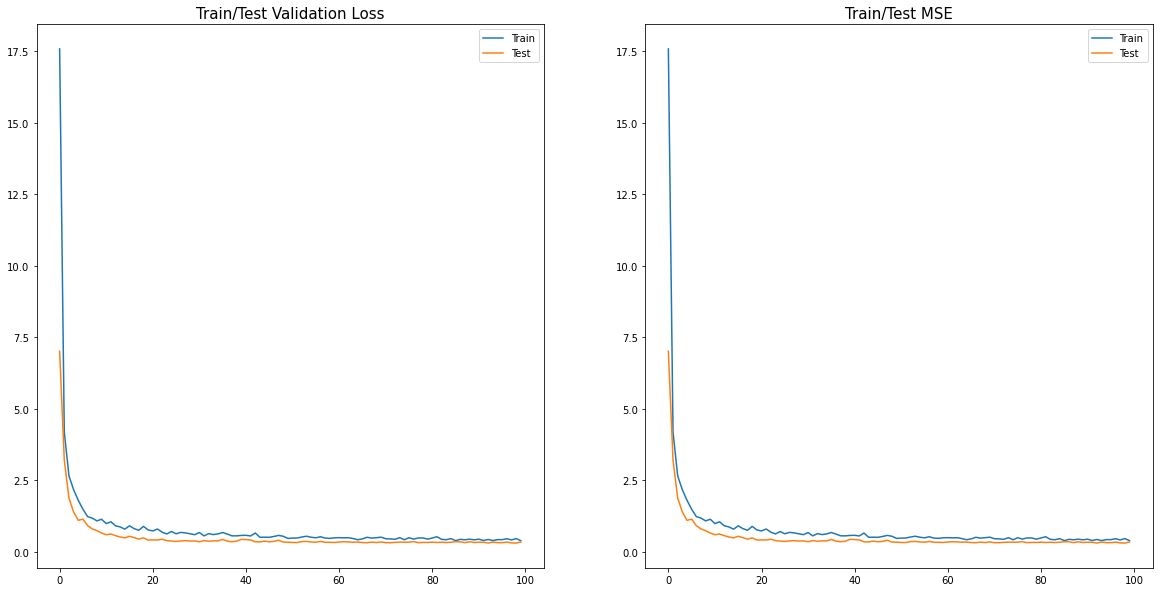

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
ax1.plot(history.history['loss'], label='Train')
ax1.plot(history.history['val_loss'], label='Test')
ax1.set_title('Train/Test Validation Loss', size=15)
ax1.legend();

ax2.plot(history.history['mean_squared_error'], label='Train')
ax2.plot(history.history['val_mean_squared_error'], label='Test')
ax2.set_title('Train/Test MSE', size=15)
ax2.legend();